In [76]:
try:
    %tensorflow_version 2.x
    COLAB = True
    print("Note: using Google CoLab")
except:
    print("Note: not using Google CoLab")
    COLAB = False

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.
Note: using Google CoLab


In [77]:
import pandas as pd
import io
import requests
import numpy as np
from sklearn import metrics
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from scipy.stats import zscore

In [78]:
df = pd.read_csv(
    "https://data.heatonresearch.com/data/t81-558/wcbreast_wdbc.csv",
    na_values=['NA', '?'])

In [79]:
df.head()

,id,diagnosis,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [80]:
# Convert to numpy - Classification
x_columns = df.columns.drop('diagnosis').drop('id')
for col in x_columns:
    df[col] = zscore(df[col])

x = df[x_columns].values
y = df['diagnosis'].map({'M':1,"B":0}).values # Binary classification, M is 1 and B is 0 

In [81]:
print(x.shape)
print(y.shape)

(569, 30)
(569,)


In [82]:
df.head()

,id,diagnosis,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
0,842302,M,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,842517,M,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,84300903,M,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,84348301,M,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,84358402,M,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


In [83]:
# Split into train/test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

# Build neural network
model = Sequential()
model.add(Dense(50, input_dim=x.shape[1], activation='relu', kernel_initializer='random_normal')) # Hidden 1
model.add(Dense(25, activation='relu', kernel_initializer='random_normal')) # Hidden 2
model.add(Dense(1, activation='sigmoid', kernel_initializer='random_normal')) # Output
model.compile(loss='binary_crossentropy', optimizer='adam', metrics = ['accuracy'])

monitor = EarlyStopping(monitor='loss', min_delta=1e-3, 
    patience=5, verbose=1, mode='auto', restore_best_weights=True)

model.fit(x_train,y_train,validation_data=(x_test,y_test), callbacks=[monitor],verbose=2,epochs=1000)

Epoch 1/1000
14/14 - 1s - loss: 0.6830 - accuracy: 0.8521 - val_loss: 0.6636 - val_accuracy: 0.9441 - 959ms/epoch - 68ms/step
Epoch 2/1000
14/14 - 0s - loss: 0.6381 - accuracy: 0.9390 - val_loss: 0.5840 - val_accuracy: 0.9441 - 68ms/epoch - 5ms/step
Epoch 3/1000
14/14 - 0s - loss: 0.5303 - accuracy: 0.9437 - val_loss: 0.4268 - val_accuracy: 0.9510 - 50ms/epoch - 4ms/step
Epoch 4/1000
14/14 - 0s - loss: 0.3676 - accuracy: 0.9484 - val_loss: 0.2455 - val_accuracy: 0.9580 - 63ms/epoch - 4ms/step
Epoch 5/1000
14/14 - 0s - loss: 0.2207 - accuracy: 0.9554 - val_loss: 0.1386 - val_accuracy: 0.9650 - 69ms/epoch - 5ms/step
Epoch 6/1000
14/14 - 0s - loss: 0.1448 - accuracy: 0.9601 - val_loss: 0.0961 - val_accuracy: 0.9650 - 71ms/epoch - 5ms/step
Epoch 7/1000
14/14 - 0s - loss: 0.1112 - accuracy: 0.9671 - val_loss: 0.0787 - val_accuracy: 0.9720 - 48ms/epoch - 3ms/step
Epoch 8/1000
14/14 - 0s - loss: 0.0952 - accuracy: 0.9718 - val_loss: 0.0718 - val_accuracy: 0.9720 - 50ms/epoch - 4ms/step
Epoch 

In [84]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc  

# Plot an ROC. pred - the predictions, y - the expected output.
def plot_roc(pred,y):
    fpr, tpr, _ = roc_curve(y, pred)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc="lower right")
    plt.show()

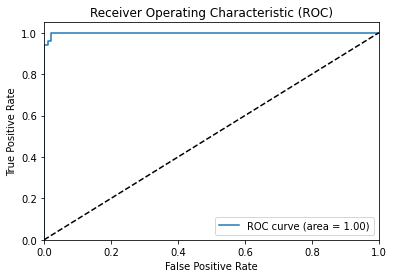

In [85]:
pred = model.predict(x_test)
plot_roc(pred,y_test)